# Image segmentation by a supervised learning 

In [1]:
import os
from pyexpat import model
import torch
from torchvision import transforms
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import statistics

In [2]:
from MyDataset import MyDataset
from MyEval import MyEval
from MyModel import MyModel
from MyResult import MyResult
from MyTrain import MyTrain

## construct dataset for training (split=`mytrain` should be used)

In [3]:
dataset = MyDataset(path='data', split='mytrain')
print('len(dataset)=', len(dataset))

len(dataset)= 400


## construct dataloader

In [4]:
batch_size = 64 # you can change this value
dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True, shuffle=True)

## plot the dataset

In [5]:
iter_data       = iter(dataloader)
(image, mask)   = next(iter_data)
print(image.shape, mask.shape)
print(image.dtype, mask.dtype)
print(f'image : (min) = {image.min()}, (max) = {image.max()}')
print(f'mask : (min) = {mask.min()}, (max) = {mask.max()}')

torch.Size([64, 1, 32, 32]) torch.Size([64, 1, 32, 32])
torch.float32 torch.float32
image : (min) = -5.109423637390137, (max) = 4.778623104095459
mask : (min) = 0.0, (max) = 1.0


## plot images

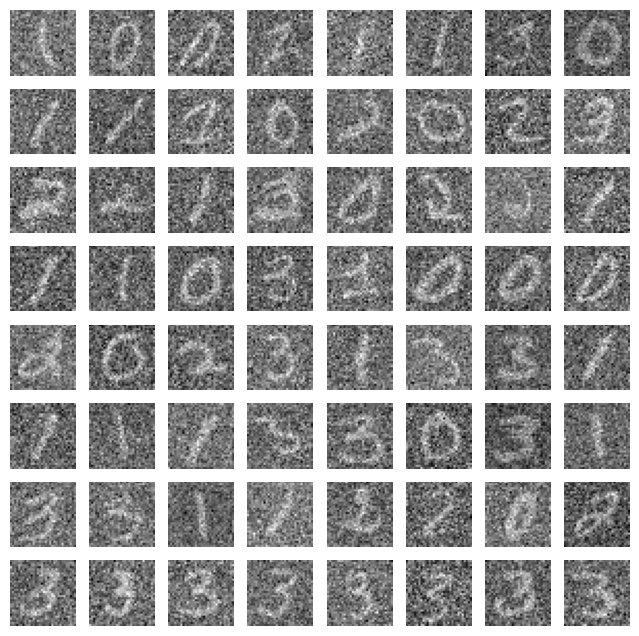

In [6]:
nRow = 8
nCol = 8
plt.figure(figsize=(nRow, nCol))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.imshow(image[idx].squeeze(0), cmap='gray')
plt.show()

## plot masks

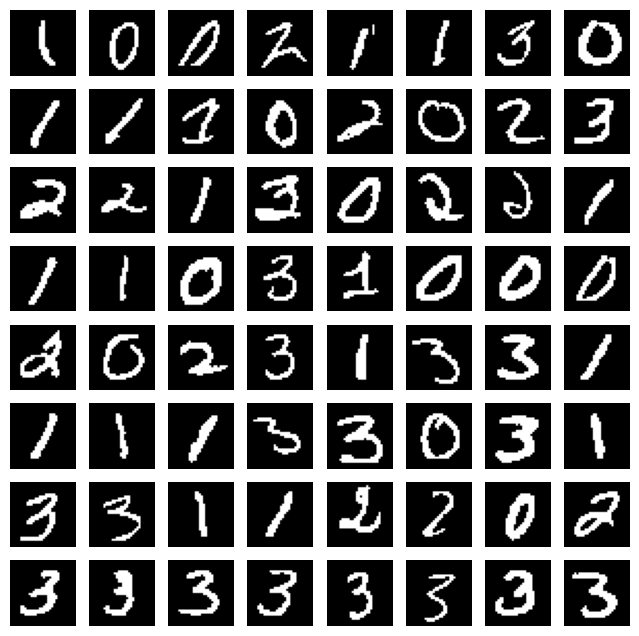

In [7]:
nRow = 8
nCol = 8
plt.figure(figsize=(nRow, nCol))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.imshow(mask[idx].squeeze(0), cmap='gray')
plt.show()

## construct model

In [8]:
model       = MyModel()
size_model  = model.size()
pred        = model(image)
print(f'image: {image.shape}')
print(f'pred: {pred.shape}')
print('model size =', size_model)
print(f'image (min)={image.min()}, (max)={image.max()}')
print(f'pred (min)={pred.min()}, (max)={pred.max()}')
print(f'mask (min)={mask.min()}, (max)={mask.max()}')

image: torch.Size([64, 1, 32, 32])
pred: torch.Size([64, 1, 32, 32])
model size = 740353
image (min)=-5.109423637390137, (max)=4.778623104095459
pred (min)=1.0367959475843236e-05, (max)=0.9973046779632568
mask (min)=0.0, (max)=1.0


## train (you should not use the ground truth)

In [9]:
trainer = MyTrain(model,dataloader,epochs=200)

trainer.train()


Epoch [1/200], Loss: 13.680085
Epoch [2/200], Loss: 11.283519
Epoch [3/200], Loss: 9.350555
Epoch [4/200], Loss: 7.720947
Epoch [5/200], Loss: 6.516394
Epoch [6/200], Loss: 5.710731
Epoch [7/200], Loss: 5.170569
Epoch [8/200], Loss: 4.739770
Epoch [9/200], Loss: 4.407559
Epoch [10/200], Loss: 4.133977
Epoch [11/200], Loss: 3.911566
Epoch [12/200], Loss: 3.739801
Epoch [13/200], Loss: 3.554085
Epoch [14/200], Loss: 3.424894
Epoch [15/200], Loss: 3.315290
Epoch [16/200], Loss: 3.214094
Epoch [17/200], Loss: 3.087598
Epoch [18/200], Loss: 3.010026
Epoch [19/200], Loss: 2.916649
Epoch [20/200], Loss: 2.860448
Epoch [21/200], Loss: 2.795358
Epoch [22/200], Loss: 2.710354
Epoch [23/200], Loss: 2.662453
Epoch [24/200], Loss: 2.600959
Epoch [25/200], Loss: 2.548216
Epoch [26/200], Loss: 2.491474
Epoch [27/200], Loss: 2.452477
Epoch [28/200], Loss: 2.402613
Epoch [29/200], Loss: 2.384171
Epoch [30/200], Loss: 2.330596
Epoch [31/200], Loss: 2.291757
Epoch [32/200], Loss: 2.249124
Epoch [33/200],

## save the trained model

In [10]:
model.eval()
model.save()    # save the trained model in 'model.pth'

## load the trained model

In [11]:
model = MyModel()   # model should not require any argument!
model.load()
model.eval()

MyModel(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

## evaluation

In [12]:
eval    = MyEval(metric='iou')
result  = MyResult()

## evaluation of the trained model on the training dataset (split=`train`)

In [13]:
batch_size  = 10 
dataset     = MyDataset(path='data', split='train') 
dataloader  = DataLoader(dataset, batch_size=batch_size, drop_last=False, shuffle=False)
threshold   = 0.5

eval.metric_reset()
for step, (image, mask) in enumerate(tqdm(dataloader)):
    pred = model(image)
    pred = (pred > threshold).float()  # Binarize the prediction
    eval.metric_update(pred, mask)

metric_value = eval.metric_compute()
result.add_result('train', metric_value)
print(f'IoU (train): {metric_value}')

  0%|          | 0/40 [00:00<?, ?it/s]

IoU (train): 0.8556917905807495


## plot the segmentation results

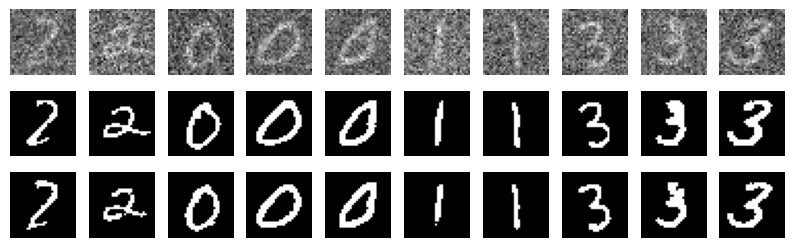

In [14]:
nRow = 3
nCol = batch_size 
plt.figure(figsize=(nCol, nRow))
for i in range(batch_size):
    plt.subplot(nRow, nCol, nCol * 0 + i + 1)
    plt.imshow(image[i].squeeze(0), cmap='gray')
    plt.axis('off')
    plt.subplot(nRow, nCol, nCol * 1 + i + 1)
    plt.imshow(mask[i].squeeze(0), cmap='gray')
    plt.axis('off')
    plt.subplot(nRow, nCol, nCol * 2 + i +1)
    plt.imshow(pred[i].squeeze(0), cmap='gray')
    plt.axis('off')
plt.show()

## evaluation of the trained model on the validation dataset (split=`val`)

In [15]:
batch_size  = 10 
dataset     = MyDataset(path='data', split='val') 
dataloader  = DataLoader(dataset, batch_size=batch_size, drop_last=False, shuffle=False)
threshold   = 0.5

eval.metric_reset()
for step, (image, mask) in enumerate(tqdm(dataloader)):
    pred = model(image)
    pred = (pred > threshold).float()  # Binarize the prediction
    eval.metric_update(pred, mask)

metric_value = eval.metric_compute()
result.add_result('val', metric_value)
print(f'IoU (val): {metric_value}')

  0%|          | 0/10 [00:00<?, ?it/s]

IoU (val): 0.7574179172515869


## plot the segmentation results

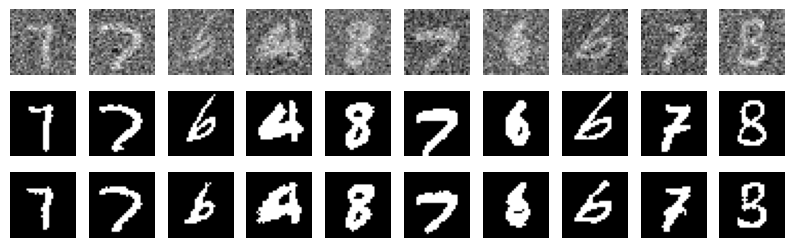

In [16]:
nRow = 3
nCol = batch_size 
plt.figure(figsize=(nCol, nRow))
for i in range(batch_size):
    plt.subplot(nRow, nCol, nCol * 0 + i + 1)
    plt.imshow(image[i].squeeze(0), cmap='gray')
    plt.axis('off')
    plt.subplot(nRow, nCol, nCol * 1 + i + 1)
    plt.imshow(mask[i].squeeze(0), cmap='gray')
    plt.axis('off')
    plt.subplot(nRow, nCol, nCol * 2 + i +1)
    plt.imshow(pred[i].squeeze(0), cmap='gray')
    plt.axis('off')
plt.show()

## save the result

In [17]:
result.save()